Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.svm import SVC



Load the data

In [ ]:
bank=pd.read_csv('/content/bank-additional-full.csv',sep=';')

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bank.skew()

<ipython-input-7-474b15bda74b>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.skew()


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


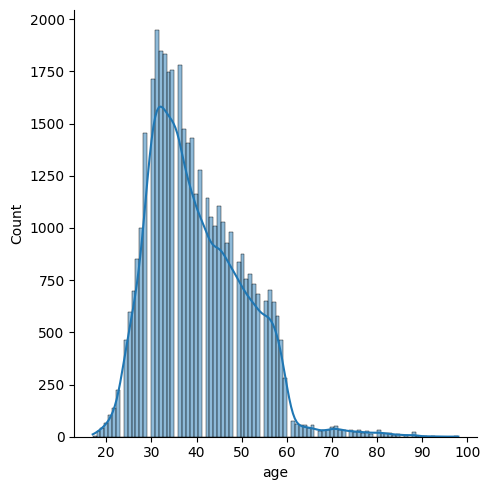

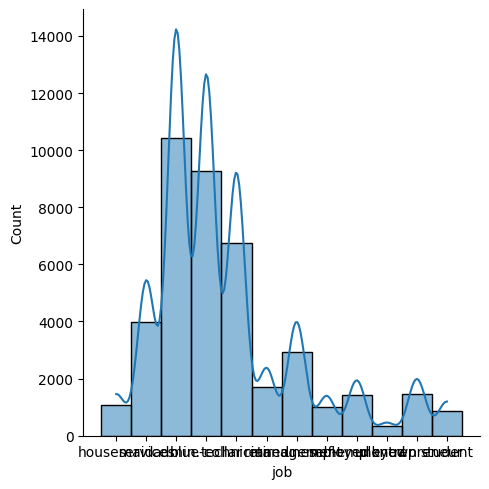

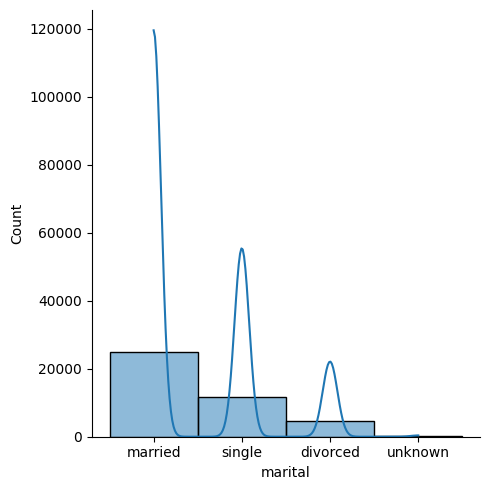

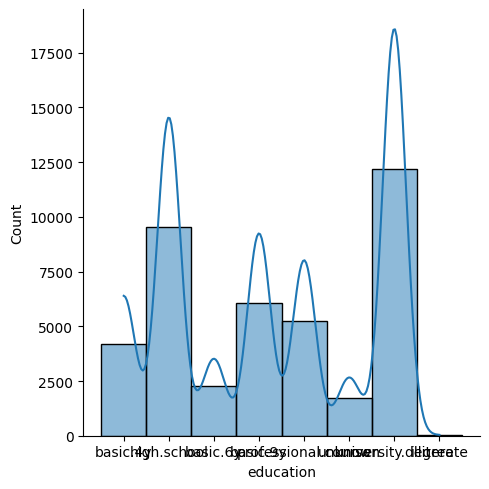

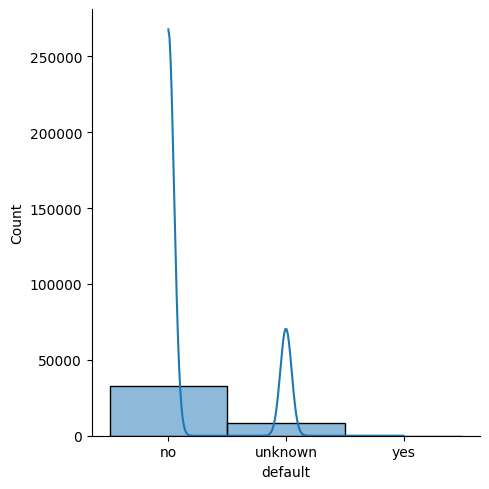

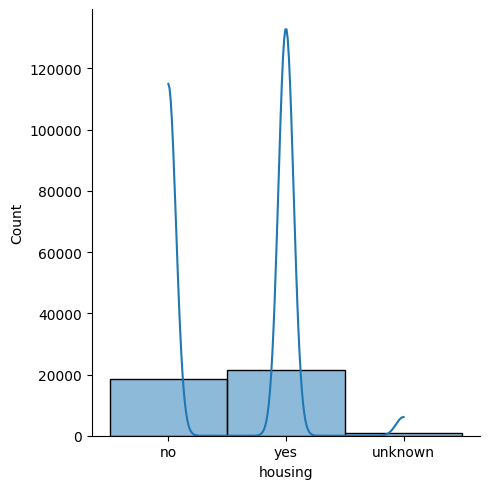

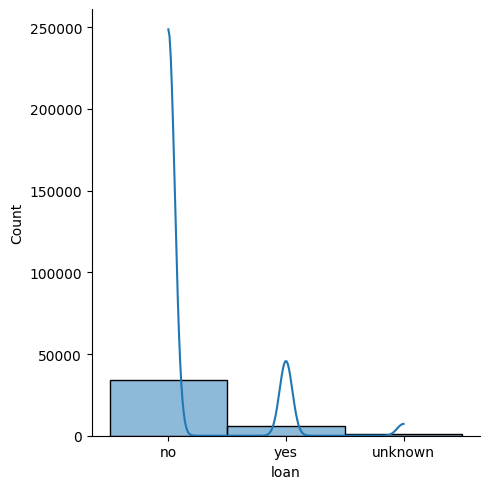

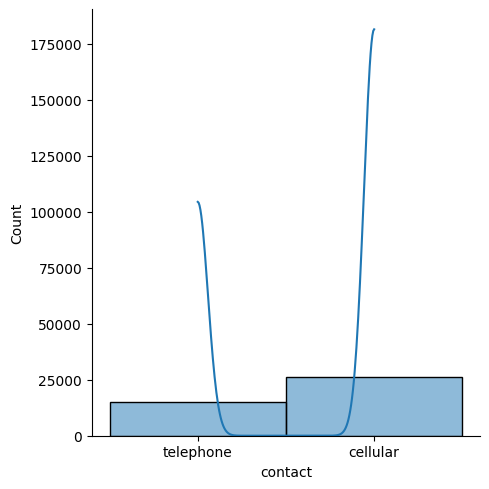

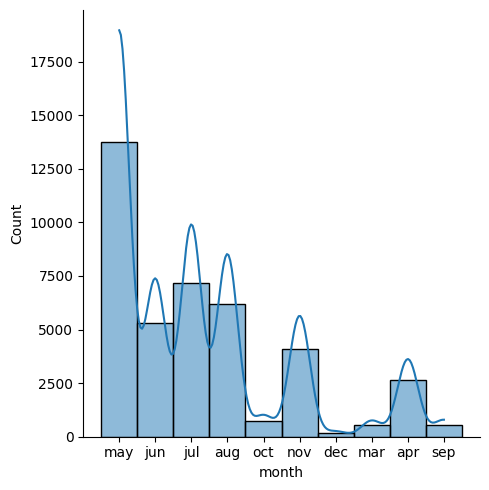

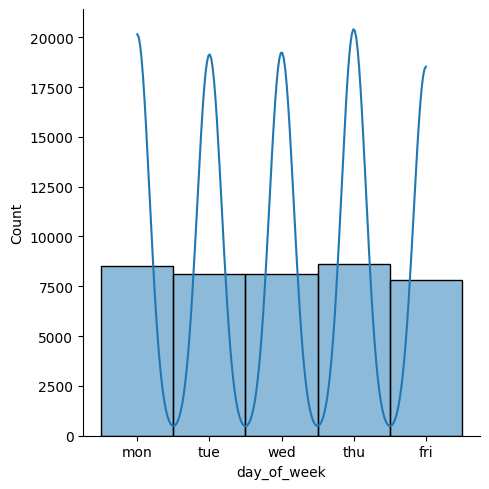

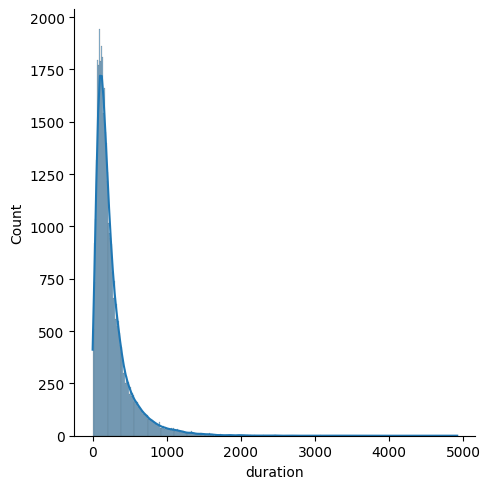

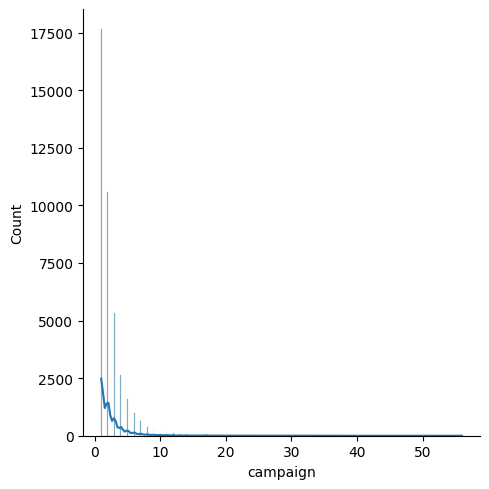

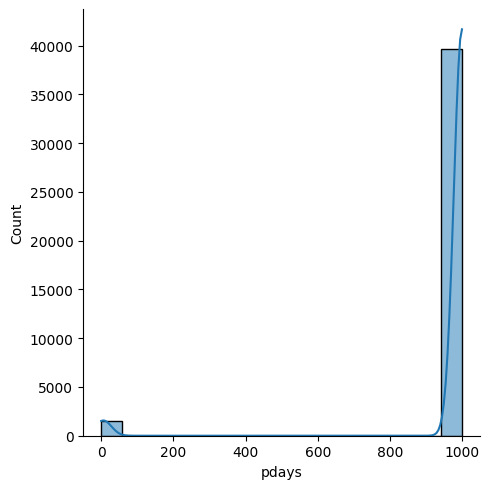

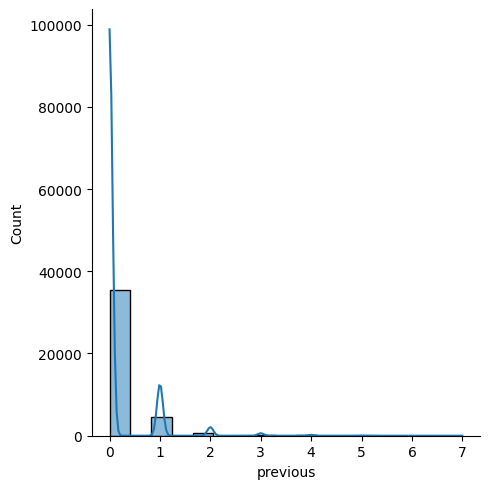

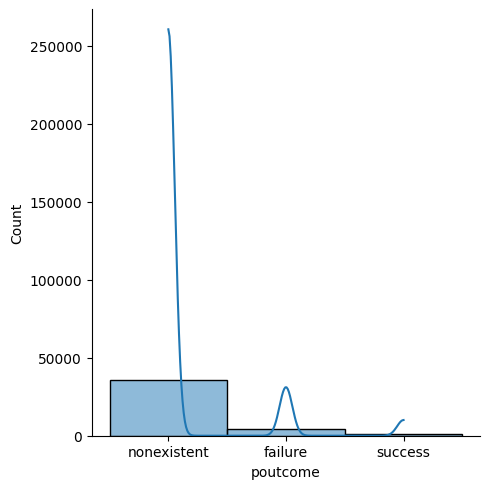

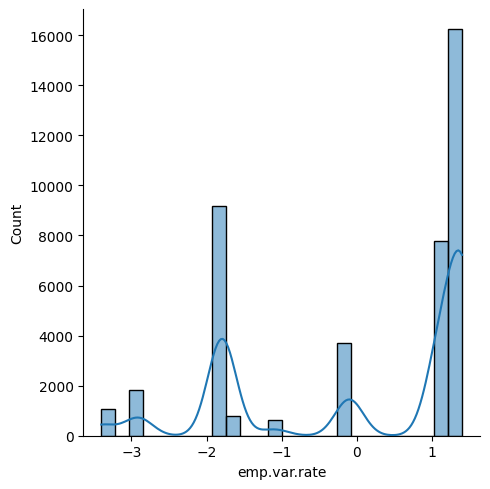

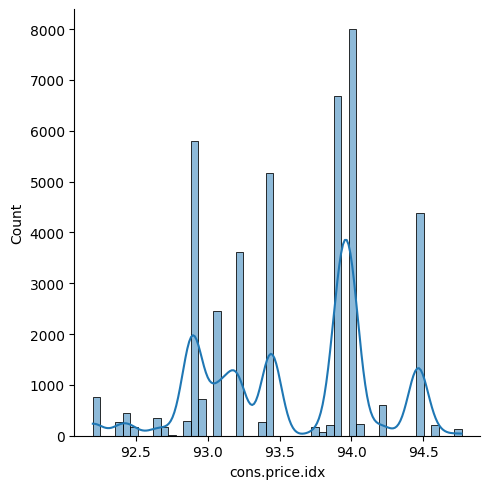

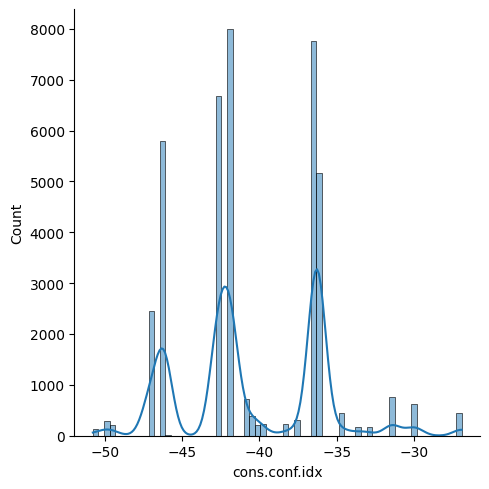

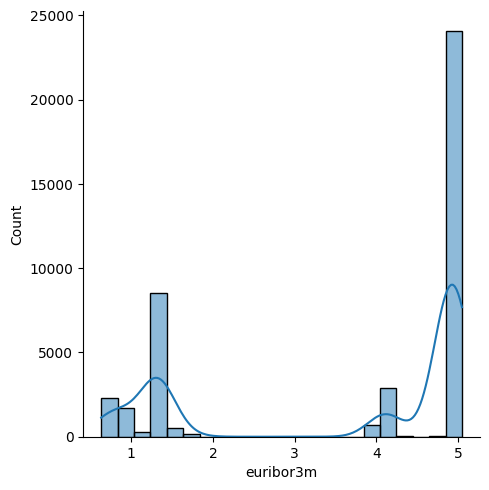

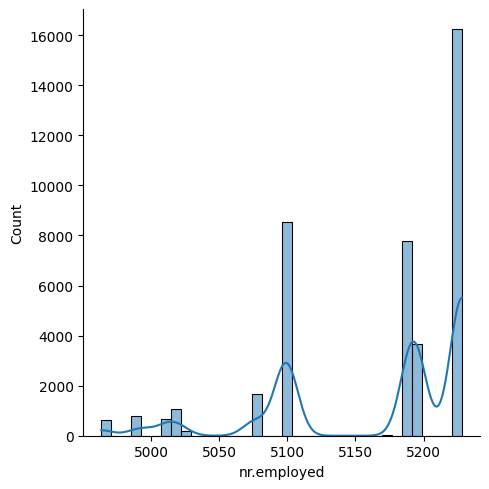

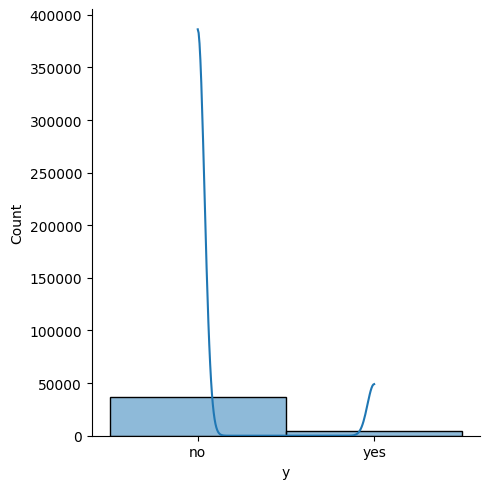

In [ ]:
for i in bank.columns:
  if bank[i].dtype=='int' or 'float':
     sns.displot(x=bank[i],kde=True)

Data Preparation

In [ ]:
data_transform=pd.get_dummies(bank.iloc[:,:-1])

In [ ]:
data_transform.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
data_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [ ]:
x=data_transform
y=bank['y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 63)
(8238, 63)
(32950,)
(8238,)


Logistic Regression

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_hat_train=logreg.predict(x_train)
y_hat_test=logreg.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train,y_hat_train)

The accuracy of the model is 0.91
[[28497   753]
 [ 2235  1465]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     29250
         yes       0.66      0.40      0.50      3700

    accuracy                           0.91     32950
   macro avg       0.79      0.69      0.72     32950
weighted avg       0.90      0.91      0.90     32950



In [ ]:
model_eval(y_test,y_hat_test)

The accuracy of the model is 0.91
[[7124  174]
 [ 545  395]]
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7298
         yes       0.69      0.42      0.52       940

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



**DecisionTree** Classifier

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_dtree)

The accuracy of the model is 1.0
[[29250     0]
 [    0  3700]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29250
         yes       1.00      1.00      1.00      3700

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [ ]:
model_eval(y_test,y_hat_test_dtree)

The accuracy of the model is 0.89
[[6784  514]
 [ 426  514]]
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7298
         yes       0.50      0.55      0.52       940

    accuracy                           0.89      8238
   macro avg       0.72      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



[link text](https://)Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is 1.0
[[29250     0]
 [    1  3699]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29250
         yes       1.00      1.00      1.00      3700

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is 0.91
[[7052  246]
 [ 487  453]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7298
         yes       0.65      0.48      0.55       940

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



Ada Boost Classifier

In [ ]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_hat_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_ada)


The accuracy of the model is 0.91
[[28460   790]
 [ 2192  1508]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     29250
         yes       0.66      0.41      0.50      3700

    accuracy                           0.91     32950
   macro avg       0.79      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



In [ ]:
model_eval(y_test,y_hat_test_ada)


The accuracy of the model is 0.91
[[7115  183]
 [ 555  385]]
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7298
         yes       0.68      0.41      0.51       940

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



*gradient* Boosting

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

The accuracy of the model is 0.92
[[28350   900]
 [ 1649  2051]]
              precision    recall  f1-score   support

          no       0.95      0.97      0.96     29250
         yes       0.70      0.55      0.62      3700

    accuracy                           0.92     32950
   macro avg       0.82      0.76      0.79     32950
weighted avg       0.92      0.92      0.92     32950



In [ ]:
model_eval(y_test,y_hat_test_gb)

The accuracy of the model is 0.92
[[7043  255]
 [ 413  527]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7298
         yes       0.67      0.56      0.61       940

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.91      0.92      0.92      8238



XG Boost

In [ ]:

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)

y_test_enc = le.transform(y_test)


print("Encoded labels for y_train:", y_train_enc)
print("Encoded labels for y_test:", y_test_enc)



Encoded labels for y_train: [0 1 0 ... 0 0 1]
Encoded labels for y_test: [0 0 0 ... 0 0 0]


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier()
xg.fit(x_train,y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_hat_train_xgb=xg.predict(x_train)
y_hat_test_xgb=xg.predict(x_test)

In [ ]:
model_eval(y_train_enc,y_hat_train_xgb)

The accuracy of the model is 0.96
[[28840   410]
 [  848  2852]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29250
           1       0.87      0.77      0.82      3700

    accuracy                           0.96     32950
   macro avg       0.92      0.88      0.90     32950
weighted avg       0.96      0.96      0.96     32950



In [ ]:
model_eval(y_test_enc,y_hat_test_xgb)

The accuracy of the model is 0.91
[[6985  313]
 [ 398  542]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7298
           1       0.63      0.58      0.60       940

    accuracy                           0.91      8238
   macro avg       0.79      0.77      0.78      8238
weighted avg       0.91      0.91      0.91      8238



# KNN

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_hat_train_knn=knn.predict(x_train)

In [ ]:
y_hat_test_knn=knn.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_knn)

The accuracy of the model is 0.93
[[28456   794]
 [ 1462  2238]]
              precision    recall  f1-score   support

          no       0.95      0.97      0.96     29250
         yes       0.74      0.60      0.66      3700

    accuracy                           0.93     32950
   macro avg       0.84      0.79      0.81     32950
weighted avg       0.93      0.93      0.93     32950



In [ ]:
model_eval(y_test,y_hat_test_knn)

The accuracy of the model is 0.9
[[6981  317]
 [ 481  459]]
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7298
         yes       0.59      0.49      0.53       940

    accuracy                           0.90      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



SVM

In [ ]:
from sklearn.svm import SVC


svm = SVC(kernel='sigmoid',degree=3,C= 4)

svm.fit(x_train, y_train)

print("SVM model trained successfully.")


SVM model trained successfully.


In [ ]:
y_hat_train_svm=svm.predict(x_train)
y_hat_test_svm=svm.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_svm)

The accuracy of the model is 0.9
[[28640   610]
 [ 2684  1016]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     29250
         yes       0.62      0.27      0.38      3700

    accuracy                           0.90     32950
   macro avg       0.77      0.63      0.66     32950
weighted avg       0.88      0.90      0.88     32950



In [ ]:
model_eval(y_test,y_hat_test_svm)

The accuracy of the model is 0.9
[[7164  134]
 [ 682  258]]
              precision    recall  f1-score   support

          no       0.91      0.98      0.95      7298
         yes       0.66      0.27      0.39       940

    accuracy                           0.90      8238
   macro avg       0.79      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



SVM with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    "C": np.arange(2, 10, 2),
    "degree": (3, 4, 5, 6),
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}


In [ ]:
random_search_cv=RandomizedSearchCV(estimator=svm,param_distributions=params,verbose=True)

In [ ]:
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=SVC(C=4, kernel='sigmoid'),
                   param_distributions={'C': array([2, 4, 6, 8]),
                                        'degree': (3, 4, 5, 6),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=True)

In [ ]:
random_search_cv.best_params_

{'kernel': 'poly', 'degree': 6, 'C': 6}